In [1]:
# Import neccesary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
sys.path.insert(0,os.path.dirname(os.getcwd()))
import src.models.modeling_pipeline as mp
import src.models.train_model as tm

In [2]:
# Import dataframe to work with
path = os.path.dirname(os.getcwd())
filename =os.path.join(path ,'data', 'interim', 'full_feature_data.csv')
#filename = os.path.join(os.path.dirname(os.getcwd()), 'data','interim','full_feature_data.csv')
df = pd.read_csv(filename)


# filename =os.path.join(path ,'data', 'interim', 'full_feature_data.csv')

# Generate group labels by tube/defect pair
groups_labels = tm.generate_groups(df)

# Generate list of features to be trained
feature_list = mp.find_features(df, ['Amp','Phase','AB','A_','B_'])

Lasso optimization results : Compression = 7.16% , alpha : 6.993078555267327e-07, CV RMSE : 0.04618
Elastic Nets optimization results : Compression = 18.88% alpha : 1.3986157110534655e-06, CV RMSE 0.04772


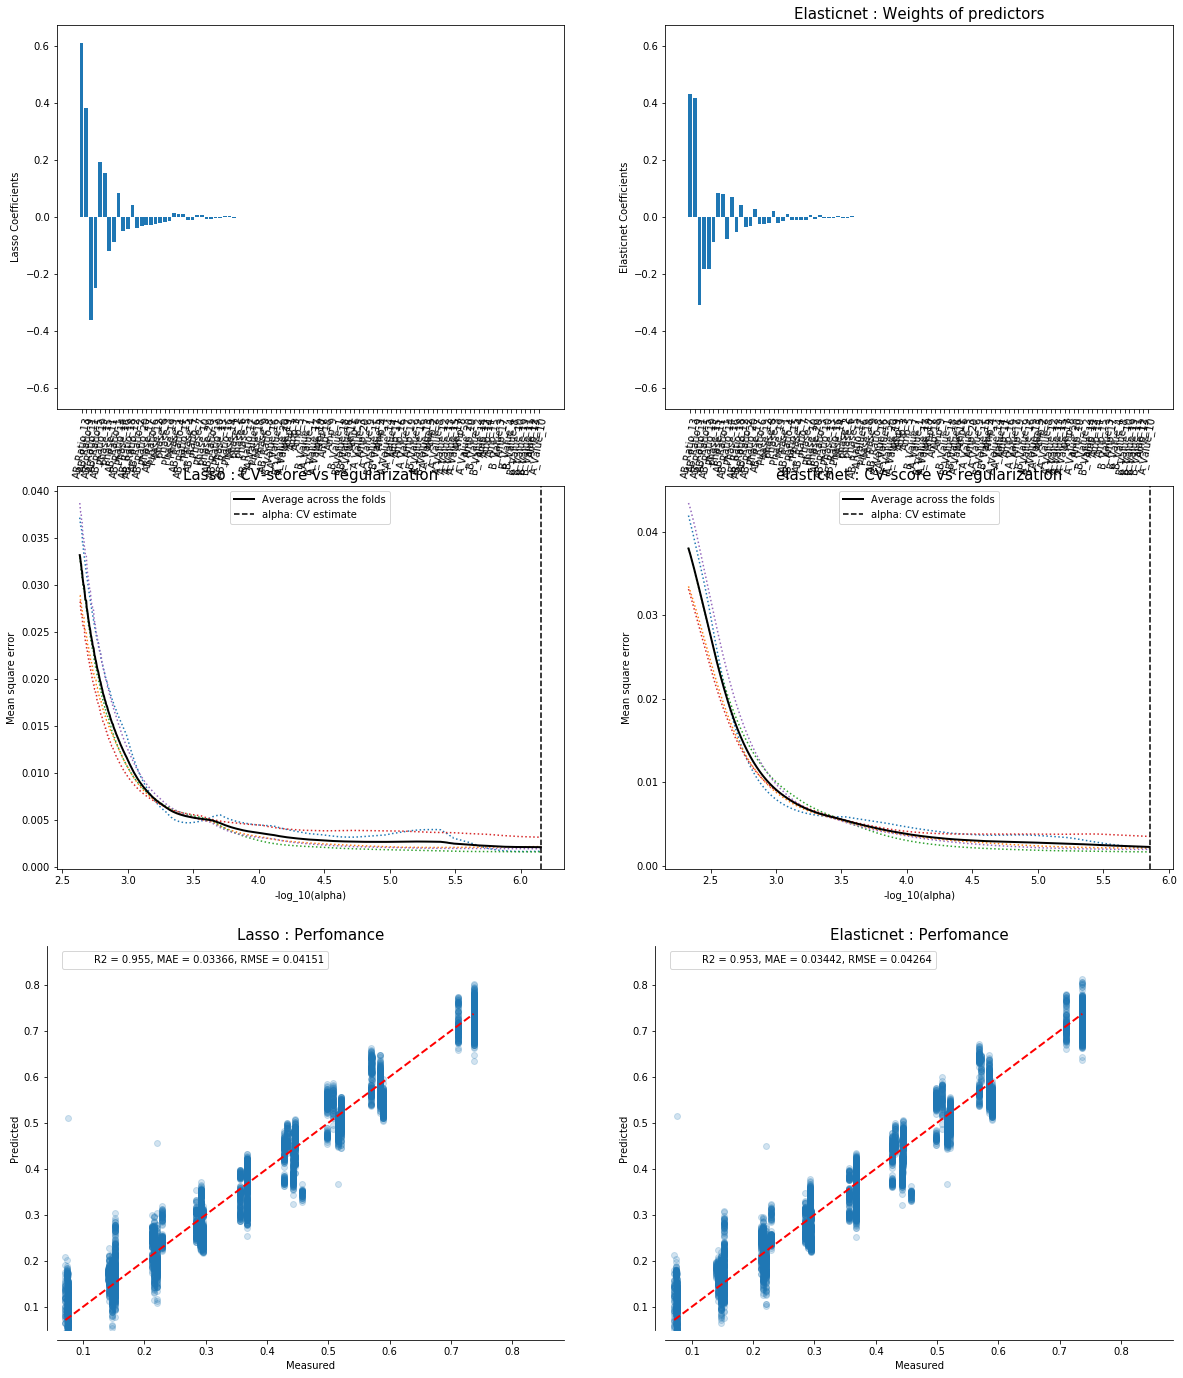

In [3]:
# No of folds for k-fold cross validation
no_folds = 5
y_feature = 'Flaw_Depth'

# Train lasso and elastic nets
[model_lasso, model_elasticnets, coef_lasso, coef_elasticnets] = tm.lasso_elasticnets_groupcv(df, feature_list, y_feature, groups_labels, no_folds)

In [4]:
#Get coefficients of lasso that are non-zero and greater than 0.0
reduced_list = (coef_lasso.index[abs(coef_lasso['Coefficients']) >0.000].tolist())

#Remove interept coefficient
reduced_list = reduced_list[:-1]

# Generate object for doing group k-folding for cross-validation
gkf = tm.generate_groupcv_object(df[reduced_list], df[y_feature], groups_labels, no_folds)

# Perform cross-validation on linear model
ols2 = LinearRegression()
ols_cv_mse = cross_val_score(ols2, df[reduced_list], df[y_feature], scoring='neg_mean_squared_error', cv=gkf)

# Average the MSE for different k-folds and convert into RMSE
ols_cv_rmse = np.sqrt(abs(ols_cv_mse).mean())
print('CV-RMSE of linear regression on remaining features: ' + str(ols_cv_rmse))

CV-RMSE of linear regression on remaining features: 0.045371992699993494
